In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
%cd /content/drive/My Drive/Capstone Project/Capstone Data with claims/

/content/drive/.shortcut-targets-by-id/12YzA2-Elb7PbRcwTgROITmiZxg5xZQdz/Capstone Project/Capstone Data with claims


In [4]:
ls

2018-data-merged.csv  demo_matrix_file.csv     outer_list.pkl
2019-data-merged.csv  ldavis_prepared_20       output.csv
2020-data-merged.csv  ldavis_prepared_20.html  tf_idf_final.pkl
2021-data-merged.csv  lsa_model_2018.pkl       Topics-2018-data-merged.csv
2022-data-merged.csv  lsa_model_2019.pkl       Topics-2019-data-merged.csv
allyears_all_new.pkl  lsa_model_2020.pkl       Topics-2020-data-merged.csv
allyears_all.pkl      out-corpus-tfidf.csv     Topics-2021-data-merged.csv
corpus_tf_idf.pkl     out.csv                  Topics-2022-data-merged.csv


In [5]:
import pandas as pd
import ast
import pickle
from sklearn.decomposition import TruncatedSVD
import numpy as np

In [6]:
ls

2018-data-merged.csv  demo_matrix_file.csv     outer_list.pkl
2019-data-merged.csv  ldavis_prepared_20       output.csv
2020-data-merged.csv  ldavis_prepared_20.html  tf_idf_final.pkl
2021-data-merged.csv  lsa_model_2018.pkl       Topics-2018-data-merged.csv
2022-data-merged.csv  lsa_model_2019.pkl       Topics-2019-data-merged.csv
allyears_all_new.pkl  lsa_model_2020.pkl       Topics-2020-data-merged.csv
allyears_all.pkl      out-corpus-tfidf.csv     Topics-2021-data-merged.csv
corpus_tf_idf.pkl     out.csv                  Topics-2022-data-merged.csv


In [7]:
!pip install pyLDAvis

!pip install pyLDAvis.gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 18.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=82fe803bbbbd31ec2cc9b247ef75ada39d73e7f4cca3d513ee071e27633110c6
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=5a91e92aef128c928ece34e501c64ec26cb5d0047ba7aa410504aab28db2625e
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built pyLDAvis sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Coul

In [8]:
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
import os

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [9]:
word_mat = pd.read_pickle('allyears_all_new.pkl')
word_mat = word_mat.T.reset_index().T
word_mat.drop('level_0',inplace=True)

In [10]:
word_mat = word_mat.T

In [11]:
word_mat = word_mat.drop(columns = [ 'third', 'say', 'wherein', 'less' , 'c' , 'b' , 'fourth' , 'array',
                          'accord', 'device', 'method', 'comprise','comprising', 'compare' ,  'whether' , 'without' ,'within',
                          'comprises', 'include', 'portion','determine', 'ratio' , 'two' , 'point' , 'period',
                          'select','position','set','use','end' , 'id'  , 'data' ,  '0', '01', '05', '1', '10', '100', '12', '15', '2', '20',
                           '200', '25', '3', '30', '4', '40', '5', '50', '500', '6' ,  '60', '70', '8', '80', '90','group' , 'cancel' , 'acceptable'])

In [12]:
from pprint import pprint
import gensim
import gensim.corpora as corpora
id2word = corpora.Dictionary([list(word_mat.columns)])

In [13]:
pickle_in = open("outer_list.pkl","rb")
outer_list_pkl = pickle.load(pickle_in)

In [14]:
df_lengths = [1,150456,307779,469536,628516,751018]

In [15]:
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel

For 2018

In [15]:
df_lengths = [1,150456,307779,469536,628516,751018]
outer_list_year = outer_list_pkl[df_lengths[0]-1:df_lengths[0+1]]
tfidf = models.TfidfModel(outer_list_year)
corpus_tfidf = tfidf[outer_list_year]

In [17]:
coherence_values = []
model_list = []
for i in range(2, 40, 1):
  # generate LSA model
  model = gensim.models.LsiModel(corpus_tfidf, num_topics= i, id2word = id2word)
  model_list.append(model)
  coherencemodel = CoherenceModel(model = model, corpus = corpus_tfidf, dictionary = id2word, coherence = 'u_mass')
  coherence_values.append(coherencemodel.get_coherence())

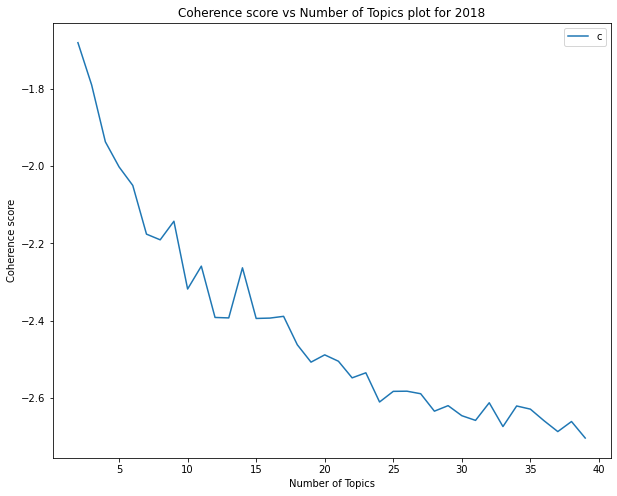

In [18]:
import matplotlib.pyplot as plt
x = range(2, 40, 1)
plt.figure(figsize = (10,8))
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.title('Coherence score vs Number of Topics plot for 2018')
plt.show()

In [24]:
coherence_values[8]

-2.3182869157835464

In [25]:
pickle.dump(model_list[8], open('lsa_model_2018.pkl', 'wb'))

In [26]:
ls

2018-data-merged.csv  demo_matrix_file.csv     tf_idf_final.pkl
2019-data-merged.csv  ldavis_prepared_20       Topics-2018-data-merged.csv
2020-data-merged.csv  ldavis_prepared_20.html  Topics-2019-data-merged.csv
2021-data-merged.csv  lsa_model_2018.pkl       Topics-2020-data-merged.csv
2022-data-merged.csv  out-corpus-tfidf.csv     Topics-2021-data-merged.csv
allyears_all_new.pkl  out.csv                  Topics-2022-data-merged.csv
allyears_all.pkl      outer_list.pkl
corpus_tf_idf.pkl     output.csv


In [27]:
lsa_model_2018 = pickle.load(open('lsa_model_2018.pkl', 'rb'))
for idx, topic in lsa_model_2018.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.239*"system" + 0.166*"computer" + 0.143*"medium" + 0.141*"layer" + 0.137*"processor" + 0.136*"signal" + 0.132*"surface" + 0.132*"program" + 0.131*"plurality" + 0.123*"information"
Topic: 1 
Words: -0.283*"layer" + 0.250*"computer" + -0.223*"surface" + 0.200*"program" + 0.191*"medium" + 0.189*"system" + 0.169*"processor" + -0.164*"material" + 0.160*"instruction" + 0.152*"nontransitory"
Topic: 2 
Words: -0.389*"acid" + -0.320*"layer" + -0.216*"composition" + -0.208*"consist" + 0.185*"member" + -0.183*"thereof" + -0.182*"agent" + -0.176*"weight" + -0.151*"cell" + -0.141*"sequence"
Topic: 3 
Words: -0.620*"layer" + 0.250*"acid" + 0.228*"signal" + -0.203*"computer" + -0.162*"program" + -0.135*"medium" + 0.133*"cell" + 0.124*"composition" + 0.120*"sequence" + -0.118*"material"
Topic: 4 
Words: 0.419*"layer" + 0.380*"signal" + -0.222*"member" + -0.201*"computer" + -0.171*"acid" + -0.168*"program" + 0.147*"voltage" + -0.142*"surface" + 0.127*"output" + -0.122*"product"
Topic

For 2019

In [28]:
outer_list_year_2019 = outer_list_pkl[df_lengths[1]-1:df_lengths[1+1]]
tfidf_2019 = models.TfidfModel(outer_list_year_2019)
corpus_tfidf_2019 = tfidf_2019[outer_list_year_2019]

In [29]:
coherence_values_2019 = []
model_list_2019 = []
for i in range(2, 40, 1):
  # generate LSA model
  model = gensim.models.LsiModel(corpus_tfidf_2019, num_topics= i, id2word = id2word)
  model_list_2019.append(model)
  coherencemodel = CoherenceModel(model = model, corpus = corpus_tfidf_2019, dictionary = id2word, coherence = 'u_mass')
  coherence_values_2019.append(coherencemodel.get_coherence())

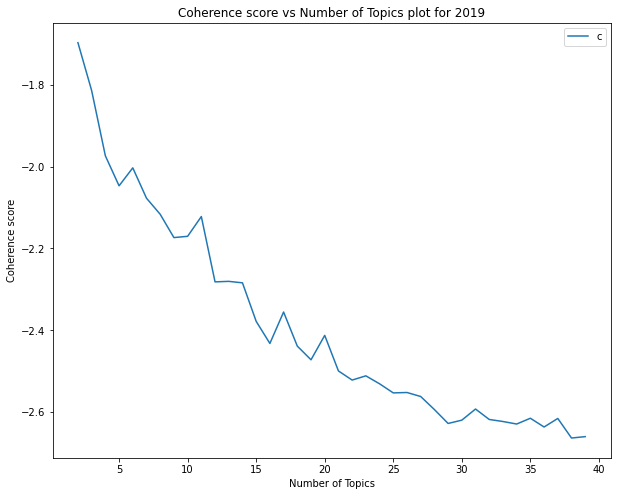

In [30]:
x = range(2, 40, 1)
plt.figure(figsize = (10,8))
plt.plot(x, coherence_values_2019)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.title('Coherence score vs Number of Topics plot for 2019')
plt.show()

In [35]:
coherence_values_2019[6], coherence_values_2019[7], coherence_values_2019[8], coherence_values_2019[9], coherence_values_2019[10]

(-2.1163741164586805,
 -2.173338563289997,
 -2.170205441618728,
 -2.121907924862948,
 -2.281604852794087)

In [36]:
pickle.dump(model_list_2019[7], open('lsa_model_2019.pkl', 'wb'))

In [37]:
lsa_model_2019 = pickle.load(open('lsa_model_2019.pkl', 'rb'))
for idx, topic in lsa_model_2019.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.247*"system" + 0.174*"computer" + 0.155*"medium" + 0.148*"processor" + 0.141*"layer" + 0.133*"program" + 0.132*"plurality" + 0.132*"signal" + 0.126*"surface" + 0.123*"information"
Topic: 1 
Words: -0.292*"layer" + 0.246*"computer" + -0.225*"surface" + 0.202*"medium" + 0.188*"program" + 0.177*"system" + 0.173*"processor" + 0.165*"nontransitory" + -0.164*"material" + 0.159*"instruction"
Topic: 2 
Words: -0.409*"acid" + -0.243*"layer" + -0.228*"composition" + -0.215*"consist" + -0.195*"thereof" + -0.191*"agent" + -0.183*"cell" + -0.178*"weight" + 0.170*"member" + -0.170*"sequence"
Topic: 3 
Words: -0.667*"layer" + 0.209*"signal" + 0.207*"acid" + -0.193*"computer" + -0.148*"medium" + -0.145*"program" + 0.129*"cell" + -0.121*"material" + -0.120*"nontransitory" + 0.116*"sequence"
Topic: 4 
Words: 0.405*"layer" + 0.375*"signal" + -0.225*"member" + -0.204*"computer" + -0.161*"program" + -0.159*"surface" + -0.145*"acid" + 0.143*"voltage" + -0.141*"medium" + 0.131*"control"
To

For 2020

In [38]:
outer_list_year_2020 = outer_list_pkl[df_lengths[2]-1:df_lengths[2+1]]
tfidf_2020 = models.TfidfModel(outer_list_year_2020)
corpus_tfidf_2020 = tfidf_2020[outer_list_year_2020]

In [39]:
coherence_values_2020 = []
model_list_2020 = []
for i in range(2, 40, 1):
  # generate LSA model
  model = gensim.models.LsiModel(corpus_tfidf_2020, num_topics= i, id2word = id2word)
  model_list_2020.append(model)
  coherencemodel = CoherenceModel(model = model, corpus = corpus_tfidf_2020, dictionary = id2word, coherence = 'u_mass')
  coherence_values_2020.append(coherencemodel.get_coherence())

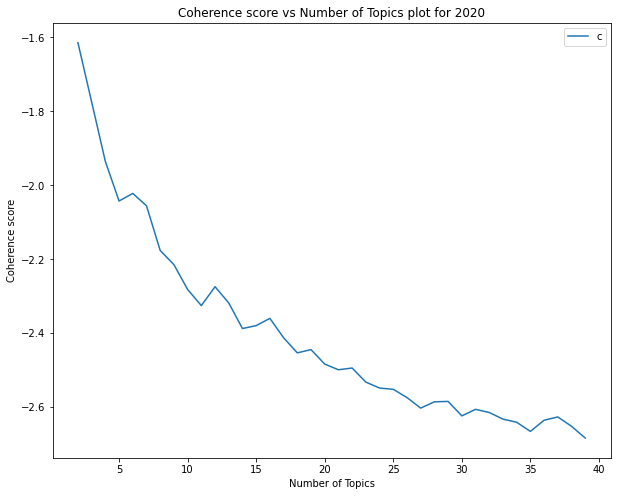

In [40]:
import matplotlib.pyplot as plt
x = range(2, 40, 1)
plt.figure(figsize = (10,8))
plt.plot(x, coherence_values_2020)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.title('Coherence score vs Number of Topics plot for 2020')
plt.show()

In [41]:
coherence_values_2020[6], coherence_values_2020[7], coherence_values_2020[8], coherence_values_2020[9], coherence_values_2020[10]

(-2.1762782985361513,
 -2.214549259673416,
 -2.2817730023818745,
 -2.3254112148981028,
 -2.2742684665291137)

In [42]:
pickle.dump(model_list_2020[9], open('lsa_model_2020.pkl', 'wb'))

In [43]:
lsa_model_2020 = pickle.load(open('lsa_model_2020.pkl', 'rb'))
for idx, topic in lsa_model_2020.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.259*"system" + 0.183*"computer" + 0.163*"medium" + 0.163*"processor" + 0.140*"program" + 0.137*"layer" + 0.133*"plurality" + 0.129*"nontransitory" + 0.129*"instruction" + 0.127*"information"
Topic: 1 
Words: -0.285*"layer" + 0.239*"computer" + -0.227*"surface" + 0.197*"medium" + 0.181*"program" + 0.177*"processor" + 0.177*"system" + 0.171*"nontransitory" + -0.164*"material" + 0.155*"instruction"
Topic: 2 
Words: -0.409*"acid" + -0.245*"composition" + -0.223*"layer" + -0.213*"consist" + -0.203*"thereof" + -0.197*"cell" + -0.185*"agent" + -0.183*"weight" + -0.165*"sequence" + 0.159*"member"
Topic: 3 
Words: -0.624*"layer" + 0.227*"signal" + -0.209*"computer" + 0.176*"acid" + -0.158*"program" + -0.157*"medium" + -0.134*"nontransitory" + -0.126*"material" + 0.125*"cell" + 0.124*"control"
Topic: 4 
Words: 0.461*"layer" + 0.311*"signal" + -0.219*"member" + -0.197*"computer" + -0.162*"acid" + -0.154*"program" + -0.151*"surface" + 0.149*"information" + 0.129*"value" + -0.127

For 2021

In [19]:
outer_list_year_2021 = outer_list_pkl[df_lengths[3]-1:df_lengths[3+1]]
tfidf_2021 = models.TfidfModel(outer_list_year_2021)
corpus_tfidf_2021 = tfidf_2021[outer_list_year_2021]

In [21]:
coherence_values_2021 = []
model_list_2021 = []
for i in range(2, 40, 1):
  # generate LSA model
  model = gensim.models.LsiModel(corpus_tfidf_2021, num_topics= i, id2word = id2word)
  model_list_2021.append(model)
  coherencemodel = CoherenceModel(model = model, corpus = corpus_tfidf_2021, dictionary = id2word, coherence = 'u_mass')
  coherence_values_2021.append(coherencemodel.get_coherence())

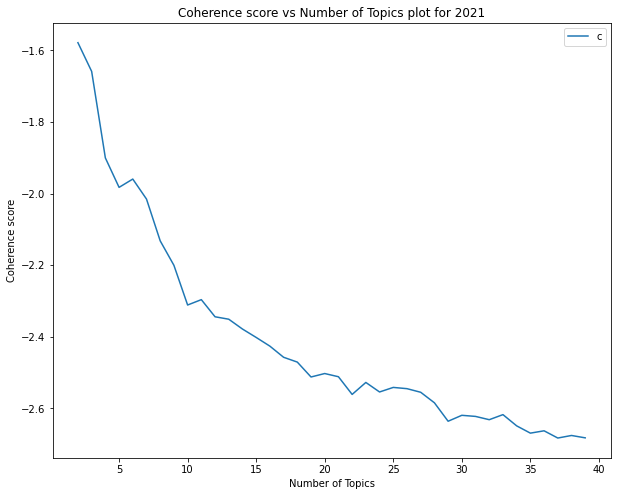

In [22]:
import matplotlib.pyplot as plt
x = range(2, 40, 1)
plt.figure(figsize = (10,8))
plt.plot(x, coherence_values_2021)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.title('Coherence score vs Number of Topics plot for 2021')
plt.show()

In [23]:
coherence_values_2021[6], coherence_values_2021[7], coherence_values_2021[8], coherence_values_2021[9], coherence_values_2021[10]

(-2.132157316809824,
 -2.2004593527853697,
 -2.311347589335587,
 -2.296350855387708,
 -2.3441999936691436)

In [24]:
pickle.dump(model_list_2021[8], open('lsa_model_2021.pkl', 'wb'))

In [25]:
lsa_model_2021 = pickle.load(open('lsa_model_2021.pkl', 'rb'))
for idx, topic in lsa_model_2021.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.262*"system" + 0.181*"computer" + 0.174*"processor" + 0.174*"medium" + 0.141*"layer" + 0.140*"nontransitory" + 0.135*"instruction" + 0.135*"program" + 0.131*"plurality" + 0.127*"information"
Topic: 1 
Words: -0.306*"layer" + -0.224*"surface" + 0.223*"computer" + 0.205*"medium" + 0.183*"processor" + 0.179*"nontransitory" + 0.170*"system" + 0.165*"program" + -0.161*"material" + 0.156*"instruction"
Topic: 2 
Words: -0.440*"acid" + -0.261*"composition" + -0.223*"thereof" + -0.222*"cell" + -0.215*"consist" + -0.204*"sequence" + -0.197*"agent" + -0.173*"weight" + 0.138*"member" + -0.137*"combination"
Topic: 3 
Words: -0.719*"layer" + 0.182*"signal" + -0.171*"computer" + -0.154*"medium" + -0.132*"nontransitory" + -0.123*"program" + -0.121*"material" + 0.112*"control" + -0.108*"computerreadable" + 0.106*"acid"
Topic: 4 
Words: 0.370*"layer" + 0.331*"signal" + -0.203*"member" + -0.198*"computer" + -0.176*"surface" + -0.172*"medium" + 0.150*"information" + -0.145*"program" + 0

For 2022

In [26]:
outer_list_year_2022 = outer_list_pkl[df_lengths[4]-1:df_lengths[4+1]]
tfidf_2022 = models.TfidfModel(outer_list_year_2022)
corpus_tfidf_2022 = tfidf_2022[outer_list_year_2022]

In [27]:
coherence_values_2022 = []
model_list_2022 = []
for i in range(2, 40, 1):
  # generate LSA model
  model = gensim.models.LsiModel(corpus_tfidf_2022, num_topics= i, id2word = id2word)
  model_list_2022.append(model)
  coherencemodel = CoherenceModel(model = model, corpus = corpus_tfidf_2022, dictionary = id2word, coherence = 'u_mass')
  coherence_values_2022.append(coherencemodel.get_coherence())

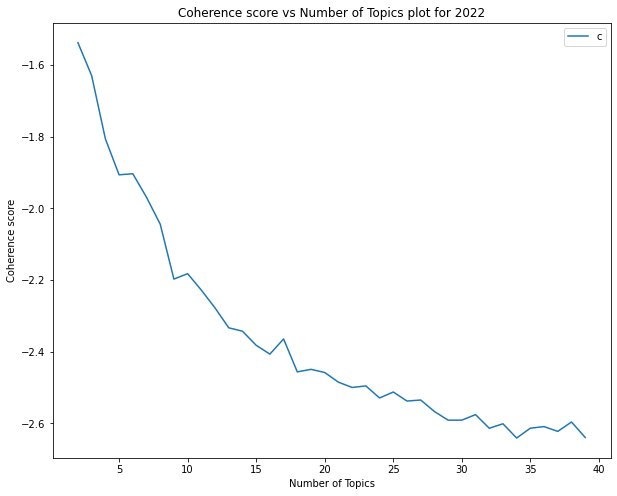

In [28]:
import matplotlib.pyplot as plt
x = range(2, 40, 1)
plt.figure(figsize = (10,8))
plt.plot(x, coherence_values_2022)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.title('Coherence score vs Number of Topics plot for 2022')
plt.show()

In [29]:
coherence_values_2022[6], coherence_values_2022[7], coherence_values_2022[8], coherence_values_2022[9], coherence_values_2022[10]

(-2.044191939680308,
 -2.197545647265865,
 -2.1824803447631247,
 -2.2282731242880702,
 -2.27804239366843)

In [30]:
pickle.dump(model_list_2022[7], open('lsa_model_2022.pkl', 'wb'))

In [31]:
lsa_model_2022 = pickle.load(open('lsa_model_2022.pkl', 'rb'))
for idx, topic in lsa_model_2022.print_topics(-1):
  print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.254*"system" + 0.185*"computer" + 0.176*"processor" + 0.171*"medium" + 0.143*"layer" + 0.140*"nontransitory" + 0.139*"program" + 0.137*"instruction" + 0.136*"plurality" + 0.126*"information"
Topic: 1 
Words: -0.316*"layer" + 0.229*"computer" + -0.220*"surface" + 0.196*"medium" + 0.186*"processor" + 0.173*"nontransitory" + 0.171*"program" + -0.159*"material" + 0.158*"instruction" + 0.158*"system"
Topic: 2 
Words: -0.461*"acid" + -0.275*"composition" + -0.236*"sequence" + -0.226*"cell" + -0.220*"consist" + -0.215*"thereof" + -0.185*"agent" + -0.165*"weight" + -0.138*"subject" + -0.134*"administer"
Topic: 3 
Words: -0.734*"layer" + 0.188*"signal" + -0.178*"computer" + -0.139*"medium" + -0.134*"program" + -0.119*"material" + -0.117*"nontransitory" + 0.109*"control" + -0.097*"computerreadable" + 0.096*"sensor"
Topic: 4 
Words: 0.370*"layer" + 0.336*"signal" + -0.226*"computer" + -0.208*"member" + -0.172*"program" + -0.172*"surface" + -0.158*"medium" + 0.150*"information" 